In [1]:
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

from torch_geometric.loader import DataLoader
from CustomDataset import CustomDataset

%config InlineBackend.figure_format = 'png2x'
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 0.5    # Axis line width
plt.rcParams['lines.linewidth'] = 1    # Line width
plt.rcParams['xtick.major.width'] = 0.5  # Set x major tick width to 2 points
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['lines.markersize'] = 4
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## 1. Overall shedding

The event of load shedding at time $t$ is defined as:
$$\Psi_t := \Phi_t > 0$$

In [2]:
## Read shedding in test data
shedding_true = []
shedding_pred = []

test_size = 200

for i in range(test_size):
    # File path
    true_path = f'../../res/IEEE_Case118/model_evaluation/agg_Shedding/true/true_{i+1}.csv'
    pred_path = f'../../res/IEEE_Case118/model_evaluation/agg_Shedding/pred/pred_{i+1}.csv'

    # Read data
    try:
        temp1 = pd.read_csv(true_path, header=None, index_col=None)
        temp2 = pd.read_csv(pred_path, header=None, index_col=None)
    except FileNotFoundError:
        print(f'The file sample_{i+1} is not found')
        continue

    # Concatenate all data
    shedding_true.append(temp1.values.copy())
    shedding_pred.append(temp2.values.copy())

# Convert to numpy array and set precision
shedding_true = np.abs(np.array(shedding_true).astype(np.int32))
shedding_pred = np.abs(np.array(shedding_pred).astype(np.int32))

############################################################################
# Set prediction shreshold as 5 (prediction < 5 is considered as no shedding)
############################################################################
shedding_pred[shedding_pred < 5] = 0

In [3]:
# Calculate probability
prob_true = np.mean((shedding_true>0), axis=0)
prob_pred = np.mean((shedding_pred>0), axis=0)

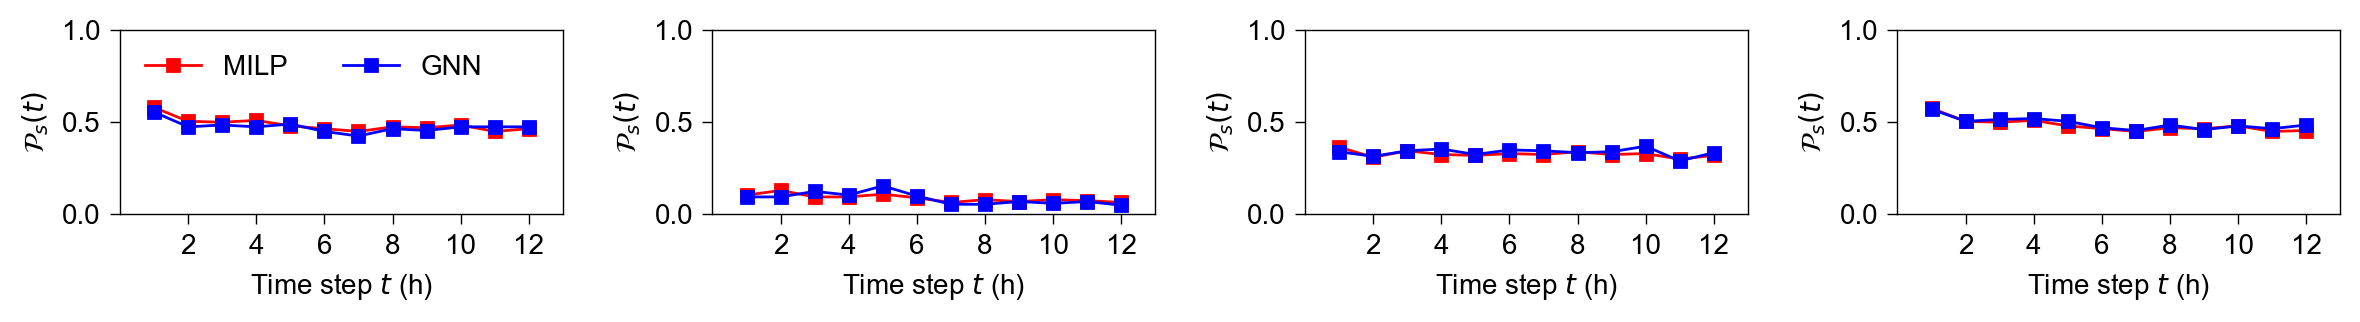

In [118]:
fig = plt.figure(figsize=(12, 1.75))

x = np.arange(1, 13)

ax = fig.add_subplot(141)
ax.plot(x, prob_true[0], color='red', marker='s', label='MILP')
ax.plot(x, prob_pred[0], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}_s(t)$')
ax.legend(loc='upper left', ncols=2, frameon=False)

ax = fig.add_subplot(142)
ax.plot(x, prob_true[1], color='red', marker='s', label='MILP')
ax.plot(x, prob_pred[1], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}_s(t)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(143)
ax.plot(x, prob_true[2], color='red', marker='s', label='MILP')
ax.plot(x, prob_pred[2], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}_s(t)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(144)
ax.plot(x, prob_true[3], color='red', marker='s', label='MILP')
ax.plot(x, prob_pred[3], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}_s(t)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

plt.tight_layout()
plt.show()
plt.close('all')

## 2. Shedding from non-reserve constraints

In [8]:
## Read shedding in test data
shedding_zero_reserve_true = []
shedding_zero_reserve_pred = []

test_size = 200

for i in range(test_size):
    # File path
    true_path = f'../../res/IEEE_Case118/model_evaluation/agg_Shedding_zero_reserve/true/true_{i+1}.csv'
    pred_path = f'../../res/IEEE_Case118/model_evaluation/agg_Shedding_zero_reserve/pred/pred_{i+1}.csv'

    # Read data
    try:
        temp1 = pd.read_csv(true_path, header=None, index_col=None)
        temp2 = pd.read_csv(pred_path, header=None, index_col=None)
    except FileNotFoundError:
        print(f'The file sample_{i+1} is not found')
        continue

    # Concatenate all data
    shedding_zero_reserve_true.append(temp1.values.copy())
    shedding_zero_reserve_pred.append(temp2.values.copy())

# Convert to numpy array and set precision
shedding_zero_reserve_true = np.abs(np.array(shedding_zero_reserve_true).astype(np.int32))
shedding_zero_reserve_pred = np.abs(np.array(shedding_zero_reserve_pred).astype(np.int32))

############################################################################
# Set prediction shreshold as 5 (prediction < 5 is considered as no shedding)
############################################################################
shedding_zero_reserve_pred[shedding_zero_reserve_pred < 5] = 0

In [9]:
# Calculate probability
prob_zero_reserve_true = np.mean((shedding_zero_reserve_true>0), axis=0)
prob_zero_reserve_pred = np.mean((shedding_zero_reserve_pred>0), axis=0)

## 3. Shedding from reserve constraints

In [10]:
# Calculate probability
prob_reserve_true = prob_true - prob_zero_reserve_true
prob_reserve_pred = prob_pred - prob_zero_reserve_pred

# Get absolute values for probability
prob_reserve_true = np.abs(prob_reserve_true)
prob_reserve_pred = np.abs(prob_reserve_pred)

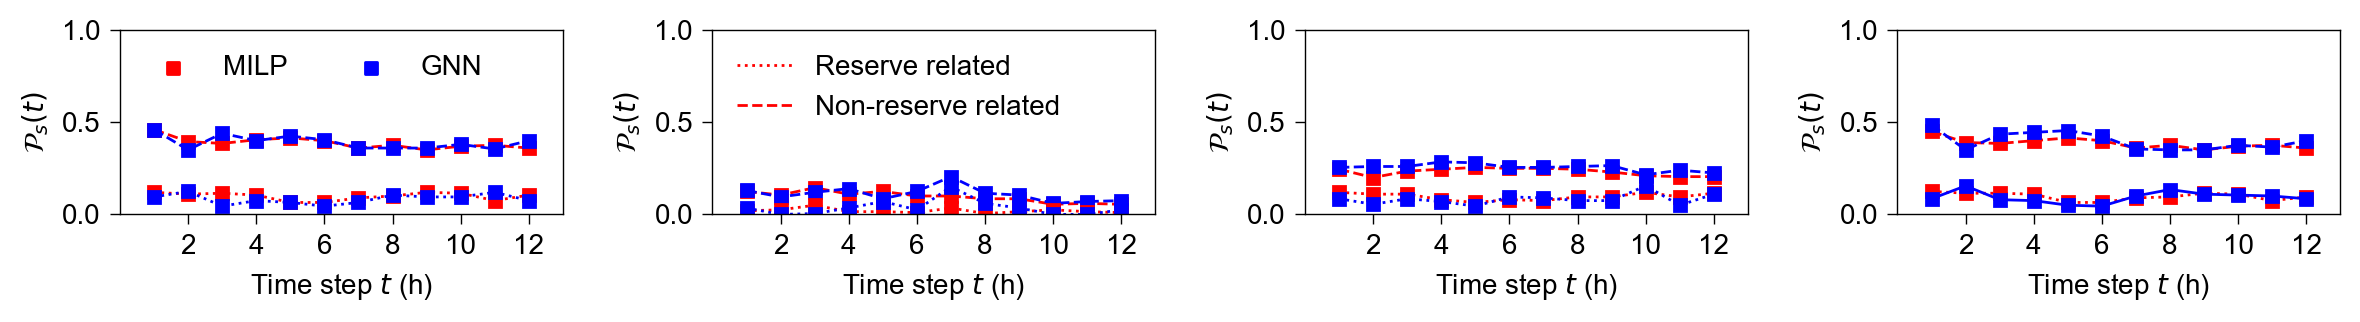

In [128]:
fig = plt.figure(figsize=(12, 1.75))

x = np.arange(1, 13)

ax = fig.add_subplot(141)
ax.plot(x, prob_zero_reserve_true[0], linestyle='dashed', color='red', marker='s', label=None)
ax.plot(x, prob_zero_reserve_pred[0], linestyle='dashed', color='blue', marker='s', label=None)
ax.plot(x, prob_reserve_true[0], linestyle='dotted', color='red', marker='s', label=None)
ax.plot(x, prob_reserve_pred[0], linestyle='dotted', color='blue', marker='s', label=None)
ax.scatter([], [], color='red', marker='s', label='MILP')
ax.scatter([], [], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}_s(t)$')
ax.legend(loc='upper left', ncols=2, frameon=False)

ax = fig.add_subplot(142)
ax.plot(x, prob_zero_reserve_true[1], linestyle='dashed', color='red', marker='s', label=None)
ax.plot(x, prob_zero_reserve_pred[1], linestyle='dashed', color='blue', marker='s', label=None)
ax.plot(x, prob_reserve_true[1], linestyle='dotted', color='red', marker='s', label=None)
ax.plot(x, prob_reserve_pred[1], linestyle='dotted', color='blue', marker='s', label=None)
ax.plot([], [], linestyle='dotted', color='red', label='Reserve related')
ax.plot([], [], linestyle='dashed', color='red', label='Non-reserve related')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}_s(t)$')
ax.legend(loc='upper left', frameon=False)

ax = fig.add_subplot(143)
ax.plot(x, prob_zero_reserve_true[2], linestyle='dashed', color='red', marker='s', label='MILP')
ax.plot(x, prob_zero_reserve_pred[2], linestyle='dashed', color='blue', marker='s', label='GNN')
ax.plot(x, prob_reserve_true[2], linestyle='dotted', color='red', marker='s', label='MILP')
ax.plot(x, prob_reserve_pred[2], linestyle='dotted', color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}_s(t)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(144)
ax.plot(x, prob_zero_reserve_true[3], linestyle='dashed', color='red', marker='s', label='MILP')
ax.plot(x, prob_zero_reserve_pred[3], linestyle='dashed', color='blue', marker='s', label='GNN')
ax.plot(x, prob_reserve_true[3], linestyle='dotted', color='red', marker='s', label='MILP')
ax.plot(x, prob_reserve_pred[3], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}_s(t)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

plt.tight_layout()
plt.show()
plt.close('all')

## Conditional probability
Conditional probability is defined as: 
$$\Delta T = 3 h$$
$$\mathcal{P}^+_s(t) = p\left(\Psi_{t+1}, \dots, \Psi_{t+\Delta T}|\Psi_t\right)$$

In [137]:
# Number of zones
num_zones= prob_true.shape[0]
# Number of time steps
T = prob_true.shape[-1]
# Time increament for conditional probability
delta_T = 3

cond_prob_true = np.zeros(prob_true.shape)
cond_prob_pred = np.zeros(prob_pred.shape)

# Calculate conditional probability ground truth
for i in range(num_zones):
    for j in range(T-delta_T):
        idx = shedding_true[:, i, j] > 0
        num = (shedding_true[idx, i, j+1:j+1+delta_T] > 0).sum(axis=1)
        cond_prob_true[i, j] = (num >= delta_T).sum() / idx.sum()

# Calculate conditional probability prediction
for i in range(num_zones):
    for j in range(T-delta_T):
        idx = shedding_pred[:, i, j] > 0
        num = (shedding_pred[idx, i, j+1:j+1+delta_T] > 0).sum(axis=1)
        cond_prob_pred[i, j] = (num >= delta_T).sum() / idx.sum()

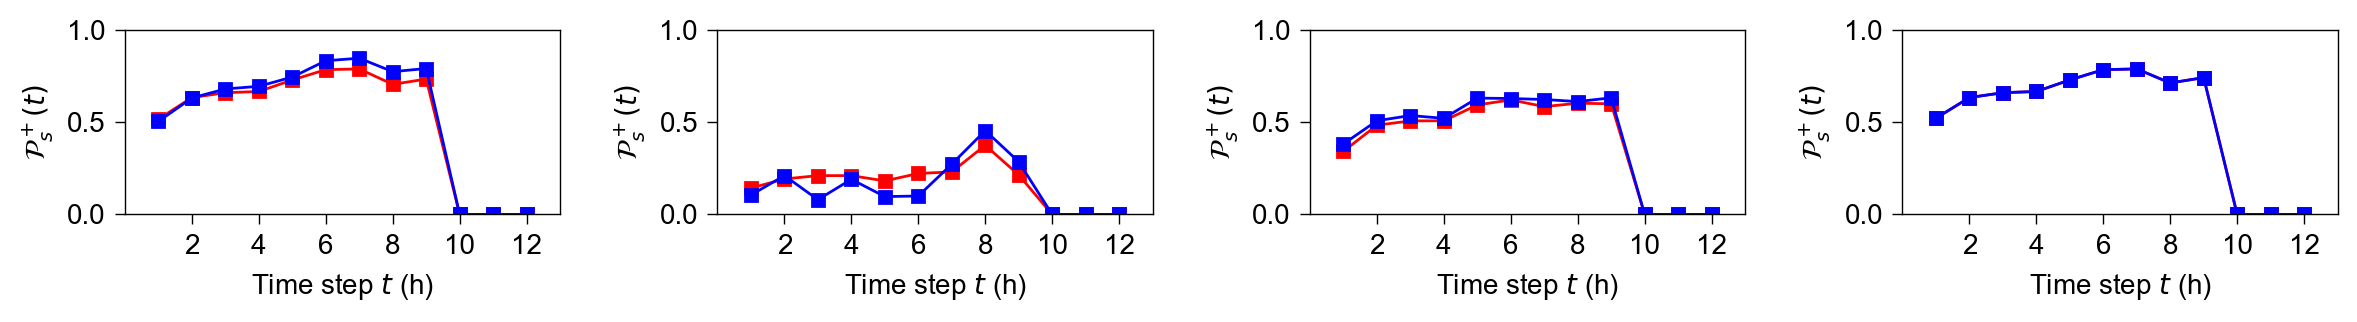

In [139]:
fig = plt.figure(figsize=(12, 1.75))

x = np.arange(1, 13)

ax = fig.add_subplot(141)
ax.plot(x, cond_prob_true[0], color='red', marker='s', label='Reserve related')
ax.plot(x, cond_prob_pred[0], color='blue', marker='s', label=None)
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}^+_s(t)$')
# ax.legend(loc='upper left', frameon=False)

ax = fig.add_subplot(142)
ax.plot(x, cond_prob_true[1], color='red', marker='s', label='MILP')
ax.plot(x, cond_prob_pred[1], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}^+_s(t)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(143)
ax.plot(x, cond_prob_true[2], color='red', marker='s', label='MILP')
ax.plot(x, cond_prob_pred[2], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}^+_s(t)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(144)
ax.plot(x, cond_prob_true[3], color='red', marker='s', label='MILP')
ax.plot(x, cond_prob_true[3], color='blue', marker='s', label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 1))
ax.set_ylabel('$\mathcal{P}^+_s(t)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

plt.tight_layout()
plt.show()
plt.close('all')

## Risk

Risk is defined as the consequence (monetary cost) of a failure event, and is calculated as the product of probability of that failure event and the predefined economic loss. However, consequence depends on the degree of failure, not simply whether that failure event happens or not. To encompass the degree of failure, risk is therefore calculated as the expectation of risk associated with MC samples.

Risk associated with sample $i$: $$R_i\left(\psi_i(t)\right) = \int_0^{\psi_i(t)} \mathcal{C}_s(\psi(t)) d\psi_{t}$$,

risk at time $t$ is then obtained as: $$\Re_s(t) = \mathbb{E}\left[R_i\left(\psi_i(t)\right)\right]$$

In [249]:
# Define cost function
Cs = 10 # Cost of shedding, $/MW
Cs_prime = np.linspace(Cs/delta_T/1.5, Cs/delta_T/5, delta_T) # Conditional cost of shedding, $/MW

## Risk associated with shedding at time t
cost_true = shedding_true * Cs
cost_pred = shedding_pred * Cs
risk_true = np.mean(cost_true, axis=0)
risk_pred = np.mean(cost_pred, axis=0)

## Risk associated with shedding between [t+1, t+delta_T]
cond_risk_true = np.zeros(risk_true.shape)
cond_risk_pred = np.zeros(risk_pred.shape)

## Calculate conditional risk
# Ground truth
for i in range(num_zones):
    for j in range(T-delta_T):
        idx = shedding_true[:, i, j] > 0
        cond_cost_true = shedding_true[idx, i, j+1:j+1+delta_T] * Cs_prime
        cond_risk_true[i, j] = cond_cost_true.mean(axis=0).sum()
## Prediction
for i in range(num_zones):
    for j in range(T-delta_T):
        idx = shedding_pred[:, i, j] > 0
        cond_cost_pred = shedding_pred[idx, i, j+1:j+1+delta_T] * Cs_prime
        cond_risk_pred[i, j] = cond_cost_pred.mean(axis=0).sum()

## Calculate overall risk
overall_risk_true = risk_true + cond_risk_true
overall_risk_pred = risk_pred + cond_risk_pred

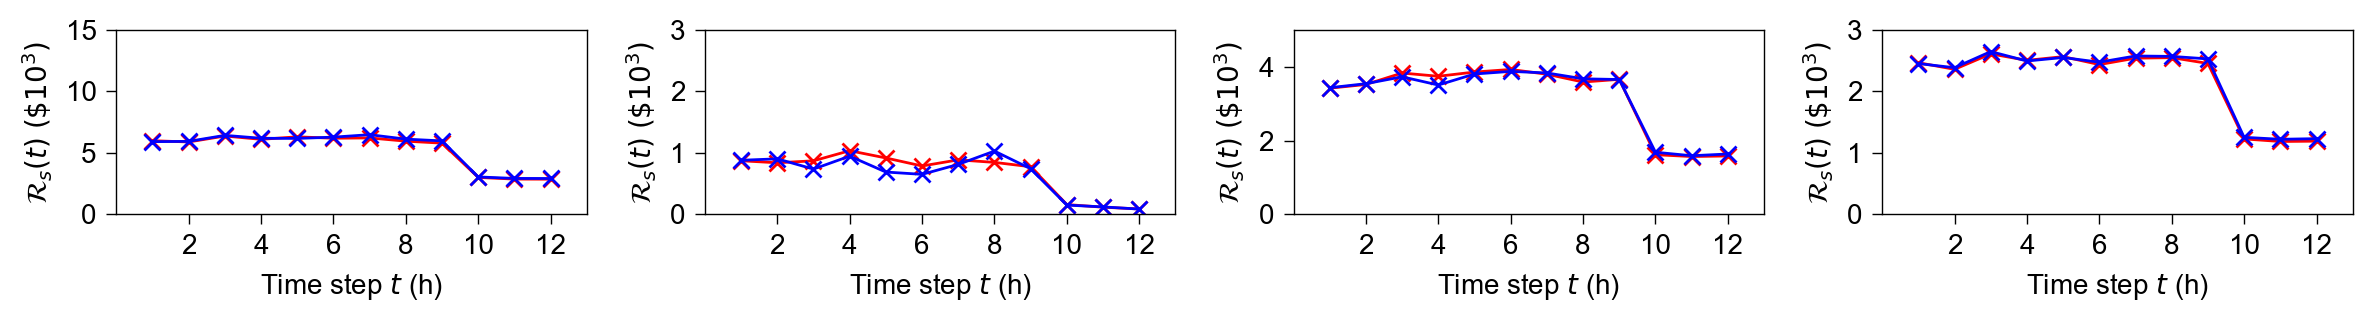

In [252]:
fig = plt.figure(figsize=(12, 1.75))

x = np.arange(1, 13)

ax = fig.add_subplot(141)
ax.plot(x, overall_risk_true[0]/1000, color='red', marker='x', markersize=6, label='Reserve related')
ax.plot(x, overall_risk_pred[0]/1000, color='blue', marker='x', markersize=6, label=None)
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 15))
ax.set_ylabel('$\mathcal{R}_s(t)$ $(\$10^3)$')
# ax.legend(loc='upper left', frameon=False)

ax = fig.add_subplot(142)
ax.plot(x, overall_risk_true[1]/1000, color='red', marker='x', markersize=6, label='MILP')
ax.plot(x, overall_risk_pred[1]/1000, color='blue', marker='x', markersize=6, label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 3))
ax.set_ylabel('$\mathcal{R}_s(t)$ $(\$10^3)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(143)
ax.plot(x, overall_risk_true[2]/1000, color='red', marker='x', markersize=6, label='MILP')
ax.plot(x, overall_risk_pred[2]/1000, color='blue', marker='x', markersize=6, label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 5))
ax.set_ylabel('$\mathcal{R}_s(t)$ $(\$10^3)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

ax = fig.add_subplot(144)
ax.plot(x, overall_risk_true[3]/1000, color='red', marker='x', markersize=6,  label='MILP')
ax.plot(x, overall_risk_pred[3]/1000, color='blue', marker='x', markersize=6, label='GNN')
ax.set_xlim((0, 13))
ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xlabel('Time step $t$ (h)')
ax.set_ylim((0, 3))
ax.set_ylabel('$\mathcal{R}_s(t)$ $(\$10^3)$')
# ax.legend(loc='upper right', ncols=2, frameon=False)

plt.tight_layout()
plt.show()
plt.close('all')